Ejercicio 1.
Genera una imagen semejante a un tablero de ajedrez tomando en cuenta que cada 
casilla debe medir 100x100 px como se muestra en la imagen a continuación (toma en 
cuenta la saturación de los colores)

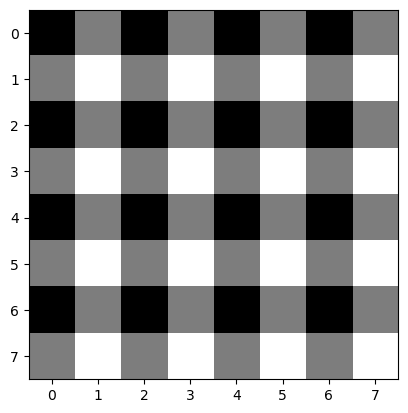

In [19]:
import numpy as np
import matplotlib.pyplot as plt


n = 8

tablero = np.zeros((n,n), dtype=np.uint8)

# Rellenar el tablero con casillas blancas (valor 255) y negras (valor 0) alternadas
for i in range(n):
    for j in range(n):

        if i % 2 == 0:
            if (i + j) % 2 == 0:
                tablero[i, j] = 0  # Casilla blanca
            else:
                tablero[i, j] = 125    # Casilla negra
        else:
            if (i + j) % 2 == 0:
                tablero[i, j] = 255  # Casilla pla
            else:
                tablero[i, j] = 125    # Casilla negra


plt.imshow(tablero, cmap='gray', vmin=0, vmax=255)

plt.show()


Ejercicio 2.
Tomando en cuenta la imagen2.jpg aplica un degradado lineal en ella.

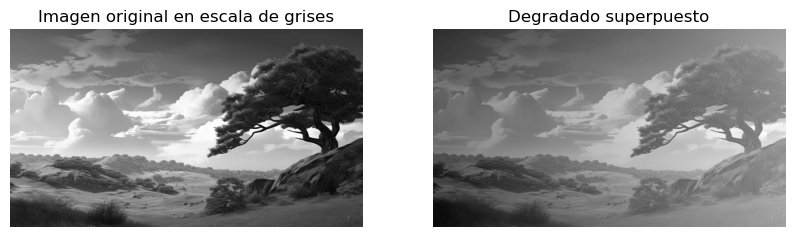

In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Cargar la imagen desde tu PC

original_image = cv2.imread('imagen2.jpeg')
# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Crear un degradado del mismo tamaño que la imagen en escala de grises
height, width = gray_image.shape
gradient = np.zeros_like(gray_image)

# Aplicar un degradado a la imagen en escala de grises
for i in range(height):
    for j in range(width):
        gradient[i, j] = int(255 * (i / width))  # Valor de intensidad aumenta de arriba a abajo

# Superponer el degradado sobre la imagen en escala de grises
gradient_on_gray = cv2.addWeighted(gray_image, 0.5, gradient, 0.5, 0)

# Mostrar la imagen original en escala de grises y la imagen con degradado superpuesto
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen original en escala de grises')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gradient_on_gray, cmap='gray')
plt.title('Degradado superpuesto')
plt.axis('off')

plt.show()

Ejercicio 3.
En la imagen1.jpg aplica una mascara triangular como se ve en la imagen.


In [50]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = cv2.imread('imagen1.jpg', cv2.IMREAD_GRAYSCALE)

alto, ancho = img.shape[:2]

mascara = np.zeros_like(img)
circulo = (ancho // 2, alto // 3)

radio = 300
cv2.triangulatePoints(mascara, circulo, radio, (255), -1)

img_fin = cv2.bitwise_and(img, img, mask=mascara)

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(img_fin, cmap='gray')
plt.title('img_tras')

plt.show()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\calib3d\src\triangulate.cpp:75: error: (-209:Sizes of input arguments do not match) Number of proj points coordinates must be == 2 in function 'icvTriangulatePoints'


Ejercicio 4.
Tomando en cuenta la imagen2.jpg elige un punto de interés al azar, genera su histograma 
por canales, solariza y posteriza la imagen, realiza un tratamiento de umbralización(el de 
preferencia), guarda todas las imágenes resultantes con sus correspondientes nombres y 
muéstralas con jupyter.

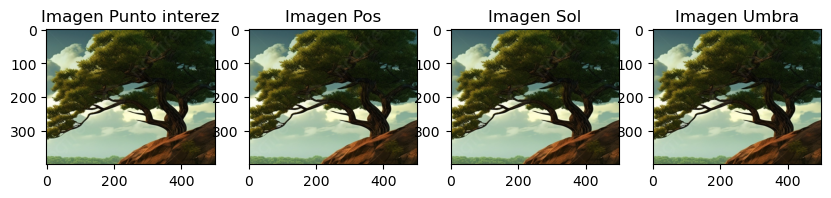

In [73]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

def solarizar(imagen,umbral):
    img_solarizada = np.where(imagen<umbral,imagen,255-imagen)
    cv2.imwrite('img2Solarizada.jpg',puntointeres)

def posterizar(imagen,nivel):
    f_nvl = 255/nivel
    img_poster = np.round(imagen/f_nvl)*f_nvl
    img_poster2 =  img_poster.astype(np.uint8)
    cv2.imwrite('img2Posterizada.jpg',puntointeres)

def Umbralizacion_binaria(img):
    _, umbralbi = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    cv2.imwrite('img2Umbralizada.jpg',puntointeres)


img_cancerbgr = cv2.imread('imagen2.jpeg')

imagen2 = cv2.cvtColor(img_cancerbgr,cv2.COLOR_BGR2RGB)


puntointeres = (imagen2[100:500,700:1200,:])#[x,y,canales]
cv2.imwrite('PuntoInteres.jpg',puntointeres)

imagenInteres = cv2.imread('PuntoInteres.jpg',cv2.IMREAD_ANYCOLOR)
imagen_original = cv2.cvtColor(imagenInteres,cv2.COLOR_RGB2BGR)
img_gris = cv2.cvtColor(imagenInteres,cv2.COLOR_BGR2GRAY)

umbral = 150
solarizar(img_gris,umbral)

nivel = 3
posterizar(img_gris,nivel)

Umbralizacion_binaria(imagenInteres)

imagenPos = cv2.imread('img2Posterizada.jpg',cv2.IMREAD_ANYCOLOR)
imagenSol = cv2.imread('img2Solarizada.jpg',cv2.IMREAD_ANYCOLOR)
imagenUmbra = cv2.imread('img2Umbralizada.jpg',cv2.IMREAD_ANYCOLOR)

plt.figure(figsize=(10,5))

#Referencia al array de las imagenes
plt.subplot(1,4,1)
plt.imshow(imagenInteres,cmap='gray')
plt.title('Imagen Punto interez')

plt.subplot(1,4,2)
plt.imshow(imagenPos,cmap='gray')
plt.title('Imagen Pos')

plt.subplot(1,4,3)
plt.imshow(imagenSol,cmap='gray')
plt.title('Imagen Sol')

plt.subplot(1,4,4)
plt.imshow(imagenUmbra,cmap='gray')
plt.title('Imagen Umbra')








plt.show()




Teoría:
¿A que nos referimos si hablamos de una imagen digital?
R. Una imagen digital es una representacion digital que esta en una matriz en funcion f(x,y).

¿Qué es la profundidad del color?
R. Son la intencidad en la que se manea el color mediante bits de 8, 10 o 12
¿Cuál es la diferencia entre CMKY y RGB?
R. CMKY maneja los colores base: cian,negro,amarillo,magenta. Mientras que RGB: Rojo,verde y Azul